# 第六次作业

### 随机行走：

实现代码如下：

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from numba import jit


# nw 个walker，ns步
@jit
def rw(nw, ns, R):
    walkers = np.zeros((ns + 1, nw))  # 所有人的数据
    for i in range(1, ns + 1):
        for j in range(0, nw):
            if random.random() < R:
                walkers[i, j] = walkers[i - 1, j] + 1
            else:
                walkers[i, j] = walkers[i - 1, j] - 1
    wamean = np.mean(walkers, axis=1)  # 平均值
    walkersq = walkers ** 2
    variance = np.mean(walkersq, axis=1) - wamean ** 2  # 方差
    final = walkers[ns - 1, :]  # 最后的结果
    return (wamean, variance, final)


# 计数函数，统计在min与max之间每个位置的频率
@jit
def count(data, mi, ma):
    n = ma - mi + 1
    result = np.zeros(n)
    for i in range(0, n):
        result[i] = np.where(data == mi + i)[0].shape[0]
    return result / data.shape[0]

取R=0.73，对于1000个Walkers，行走100步的平均值与方差，以及10k个walkers走900步的最终结果统计如下：

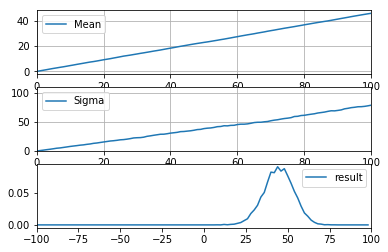

In [2]:
R = 0.73
m, v, fi = rw(1000, 100, R)
plt.subplot(3, 1, 1)
plt.plot(m,label='Mean')
plt.xlim(0, 100)
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(v,label='Sigma')
plt.xlim(0, 100)
plt.ylim(0, 110)
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
fi = rw(10000, 100, R)[2]

# hy, hx = np.histogram(fi, bins=range(-100, 102, 1), density=True)
# plt.plot(hx[0:201], hy)
hx = np.arange(-100, 100,2)
hy = count(fi, -100, 100)[range(1,200,2)]
plt.plot(hx, hy,label='result')
plt.xlim(-100, 100)
plt.legend()

plt.show()

取R=0.5，对于1000个Walkers，行走100步的平均值与方差，以及10k个walkers走900步的最终结果统计如下：

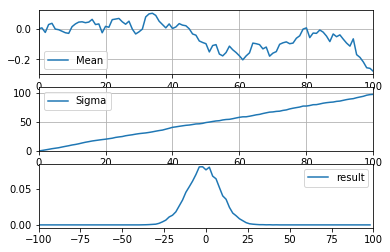

In [3]:
R = 0.5
m, v, fi = rw(1000, 100, R)
plt.subplot(3, 1, 1)
plt.plot(m,label='Mean')
plt.xlim(0, 100)
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(v,label='Sigma')
plt.xlim(0, 100)
plt.ylim(0, 110)
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
fi = rw(10000, 100, R)[2]

# hy, hx = np.histogram(fi, bins=range(-100, 102, 1), density=True)
# plt.plot(hx[0:201], hy)
hx = np.arange(-100, 100,2)
hy = count(fi, -100, 100)[range(1,200,2)]
plt.plot(hx, hy,label='result')
plt.xlim(-100, 100)
plt.legend()

plt.show()

取R=0.37，对于1000个Walkers，行走100步的平均值与方差，以及10k个walkers走900步的最终结果统计如下：

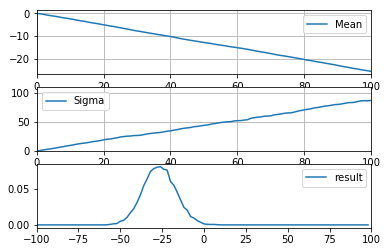

In [4]:
R = 0.37
m, v, fi = rw(1000, 100, R)
plt.subplot(3, 1, 1)
plt.plot(m,label='Mean')
plt.xlim(0, 100)
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(v,label='Sigma')
plt.xlim(0, 100)
plt.ylim(0, 110)
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
fi = rw(10000, 100, R)[2]

# hy, hx = np.histogram(fi, bins=range(-100, 102, 1), density=True)
# plt.plot(hx[0:201], hy)
hx = np.arange(-100, 100,2)
hy = count(fi, -100, 100)[range(1,200,2)]
plt.plot(hx, hy,label='result')
plt.xlim(-100, 100)
plt.legend()

plt.show()

可以看到，当$R=0.5$时，由于最终位置期望为0，所以mean的图像波动不定，而$R\neq 0.5$时，
位置的期望为$n(2R-1)$，所以mean随时间变化近似为一条直线

随着$|2R-1|$的增大，walker越来越倾向于往一个方向走，所以方差增大的速率减小。

对于最后的结果，由中心极限定理知最后结果的分布为高斯分布，中心位置为期望的位置，所以$R>0.5$时中心在0右边，$R<0.5$时中心在0左边。